### Import Packages

In [1]:
import pandas as pd
import matplotlib as plt

### Import Data from sources
#### Import housing data

In [36]:
# import house annual house prices
"""
prices = pd.read_excel("E:/Projects/real-estate-analysis/data/vastgoed_2010_2021.xlsx", sheet_name=str(2010))
for i in range(10):
    new_df = pd.read_excel("E:/Projects/real-estate-analysis/data/vastgoed_2010_2021.xlsx", sheet_name=str(2011 + i))
    prices = pd.concat([prices, new_df])
prices.head()
"""
prices = pd.read_csv("E:/Projects/real-estate-analysis/data/annual_prices.csv")
prices.head()

,Unnamed: 0,Unnamed: 0.1,CD_YEAR,CD_TYPE_NL,CD_TYPE_FR,CD_REFNIS,CD_REFNIS_NL,CD_REFNIS_FR,CD_PERIOD,CD_CLASS_SURFACE,MS_TOTAL_TRANSACTIONS,MS_P_25,MS_P_50_median,MS_P_75,CD_niveau_refnis
0,0,0,2010,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q1,totaal / total,13078.0,110000.0,156000.0,210000.0,1
1,1,1,2010,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q2,totaal / total,14059.0,114000.0,159500.0,212000.0,1
2,2,2,2010,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q3,totaal / total,13917.0,118000.0,165000.0,220000.0,1
3,3,3,2010,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,Q4,totaal / total,13823.0,120000.0,165000.0,225000.0,1
4,4,4,2010,Huizen met 2 of 3 gevels (gesloten + halfopen ...,Maisons avec 2 ou 3 façades (type fermé + type...,1000,BELGIE,BELGIQUE,S1,totaal / total,27137.0,112000.0,158000.0,210000.0,1


In [35]:
# Write new df to csv for more efficient imports in the future
prices.to_csv("E:/Projects/real-estate-analysis/data/annual_prices.csv")

In [55]:
# import monthly building permit requests per region
requests_res = pd.read_excel("E:/Projects/real-estate-analysis/data/aanvragen_monthly.xlsx", 
                         sheet_name="Regions",
                        usecols="A:H", 
                            header=3)
requests_res = requests_res.rename(columns={"Unnamed: 3":"buildings", "Unnamed: 4" :"dwellings", "Unnamed: 5":"appartments", "Unnamed: 6":"one-dwelling buildings", "Unnamed: 7":"surface area"})
requests_res.head()

,Refnis,Place,Year,Month,dwellings,appartments,one-dwelling buildings,surface area
0,2000,FLANDERS REGION,2012,1,1875,3107,1404,1703
1,2000,FLANDERS REGION,2012,2,1590,2970,1537,1433
2,2000,FLANDERS REGION,2012,3,1810,4038,2444,1594
3,2000,FLANDERS REGION,2012,4,1694,4091,2641,1450
4,2000,FLANDERS REGION,2012,5,1280,2383,1247,1136


In [56]:
# import monthly building permit requests per municipality
requests_res_mun = pd.read_excel("E:/Projects/real-estate-analysis/data/aanvragen_monthly.xlsx", 
                         sheet_name="Municipalities",
                        usecols="A:H", 
                            header=3)
requests_res_mun = requests_res_mun.rename(columns={"Unnamed: 3":"buildings", "Unnamed: 4" :"dwellings", "Unnamed: 5":"appartments", "Unnamed: 6":"one-dwelling buildings", "Unnamed: 7":"surface area"})
requests_res_mun.head()

,Refnis,Place,Year,Month,dwellings,appartments,one-dwelling buildings,surface area
0,11001,AARTSELAAR,2012,1,2.0,2.0,0.0,2.0
1,11001,AARTSELAAR,2012,2,5.0,24.0,20.0,4.0
2,11001,AARTSELAAR,2012,3,4.0,12.0,11.0,1.0
3,11001,AARTSELAAR,2012,4,0.0,0.0,0.0,0.0
4,11001,AARTSELAAR,2012,5,2.0,2.0,0.0,2.0


In [ ]:
# Create year:quartiles column
prices_app_vl_quart = prices_app_vl[prices_app_vl["CD_PERIOD"].isin(['Q1', 'Q2', 'Q3', 'Q4'])]
prices_app_vl_quart["year:period"] = [str(y) + ":" + str(p) for y, p in zip(prices_app_vl_quart["CD_YEAR"], prices_app_vl_quart["CD_PERIOD"])]
prices_app_vl_quart["year:period"].head()

In [68]:
# Add quarters to requests_res and create year:quartiles column
def return_q(month_nr):
    if month_nr < 4:
        return "Q1"
    if month_nr < 7:
        return "Q2"
    if month_nr < 10:
        return "Q3"
    return "Q4"

requests_res["CD_PERIOD"] = [return_q(month) for month in requests_res["Month"]]
requests_res["year:period"] = [str(y) + ":" + str(q) for y, q in zip(requests_res["Year"], requests_res["CD_PERIOD"])]
requests_res[["year:period", "CD_PERIOD"]].head()

,year:period,CD_PERIOD
0,2012:Q1,Q1
1,2012:Q1,Q1
2,2012:Q1,Q1
3,2012:Q2,Q2
4,2012:Q2,Q2


#### Import lending data

### Exploritory Data Analysis
#### Appartment analysis for the Flanders region

In [70]:
# Select all apartments for the Flanders Region
prices_app_vl = prices[(prices["CD_REFNIS_NL"] == "VLAAMS GEWEST") & 
                       (prices["CD_TYPE_NL"] == "Appartementen")]
requests_vl = requests_res[requests_res["Place"] == "FLANDERS REGION"]

(0.0, 7873.5)

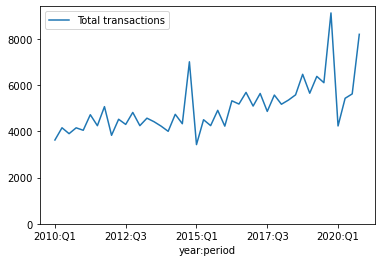

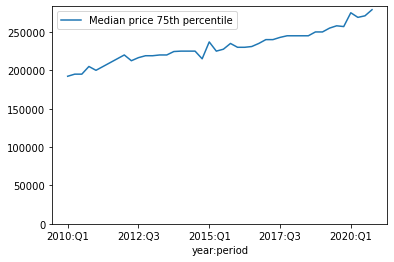

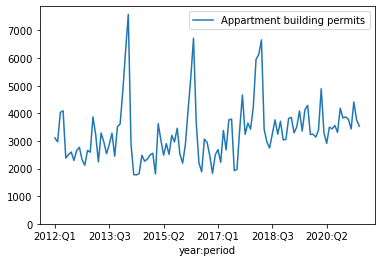

In [71]:
# Plot data
prices_app_vl_quart.plot(x="year:period", y="MS_TOTAL_TRANSACTIONS", label="Total transactions").set_ylim(0)
prices_app_vl_quart.plot(x="year:period", y="MS_P_75", label="Median price 75th percentile").set_ylim(0)
requests_vl[requests_vl["Year"] >= 2010].plot(x="year:period", y="appartments", label="Appartment building permits").set_ylim(0)

Here we can see that the amount of transactions for appartments has increased by 10 000, wich is reflected in the price that went up by 35% since 2010. The amount of building permits issued for appartments in this timeframe has almoast doubled as well.